# MSA 2025 Phase 2 - Part 1

In [36]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Find all variables and understand them

In [37]:
# Load the dataset
df = pd.read_csv("../1. Analysis and Preprocessing/datasets/X store sales/store_sales.csv", encoding='ISO-8859-1')
# Display the first 10 instances in the dataset
print(f"The first 10 instances in the datasets are:\n{df.head(10)}")


The first 10 instances in the datasets are:
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
3       6  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   
4      11  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   
5      24  US-2017-156909   7/16/2017   7/18/2017    Second Class    SF-20065   
6      25  CA-2015-106320   9/25/2015   9/30/2015  Standard Class    EB-13870   
7      28  US-2015-150630   9/17/2015   9/21/2015  Standard Class    TB-21520   
8      30  US-2015-150630   9/17/2015   9/21/2015  Standard Class    TB-21520   
9      37  CA-2016-117590   12/8/2016  12/10/2016     First Class    GH-14485   

     Customer Name    Segment        Country             City  .

In [38]:
# Provide key statistical measures
print(f"The key statistical measures are:\n{df.describe()}")

The key statistical measures are:
            Row ID   Postal Code        Sales     Quantity     Discount  \
count  2121.000000   2121.000000  2121.000000  2121.000000  2121.000000   
mean   5041.643564  55726.556341   349.834887     3.785007     0.173923   
std    2885.740258  32261.888225   503.179145     2.251620     0.181547   
min       1.000000   1040.000000     1.892000     1.000000     0.000000   
25%    2568.000000  22801.000000    47.040000     2.000000     0.000000   
50%    5145.000000  60505.000000   182.220000     3.000000     0.200000   
75%    7534.000000  90032.000000   435.168000     5.000000     0.300000   
max    9991.000000  99301.000000  4416.174000    14.000000     0.700000   

            Profit  
count  2121.000000  
mean      8.699327  
std     136.049246  
min   -1862.312400  
25%     -12.849000  
50%       7.774800  
75%      33.726600  
max    1013.127000  


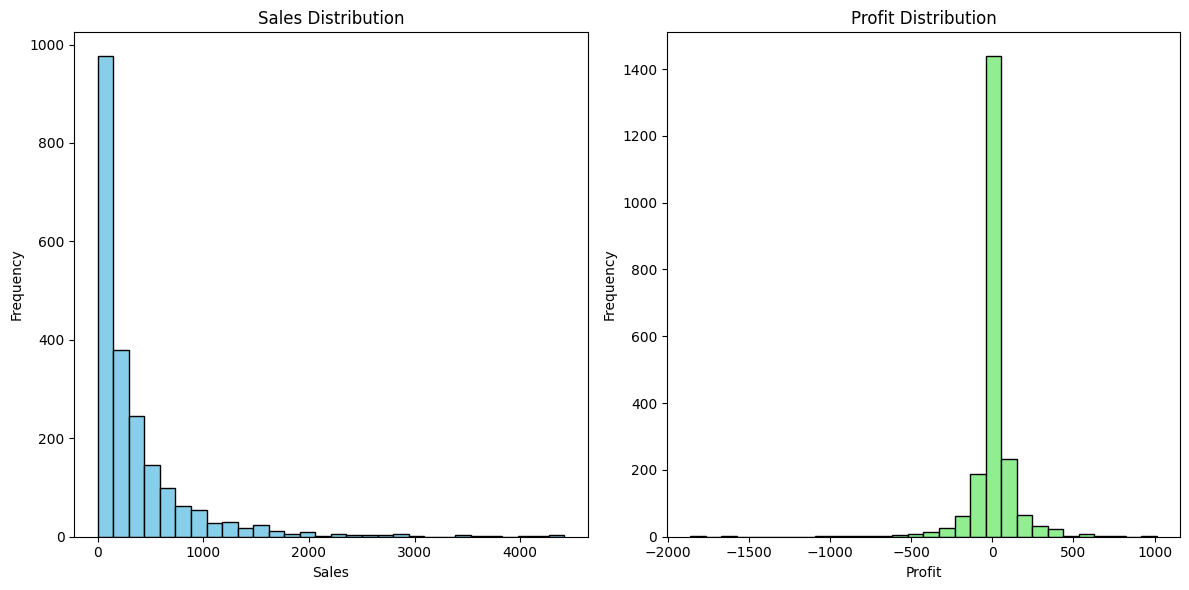

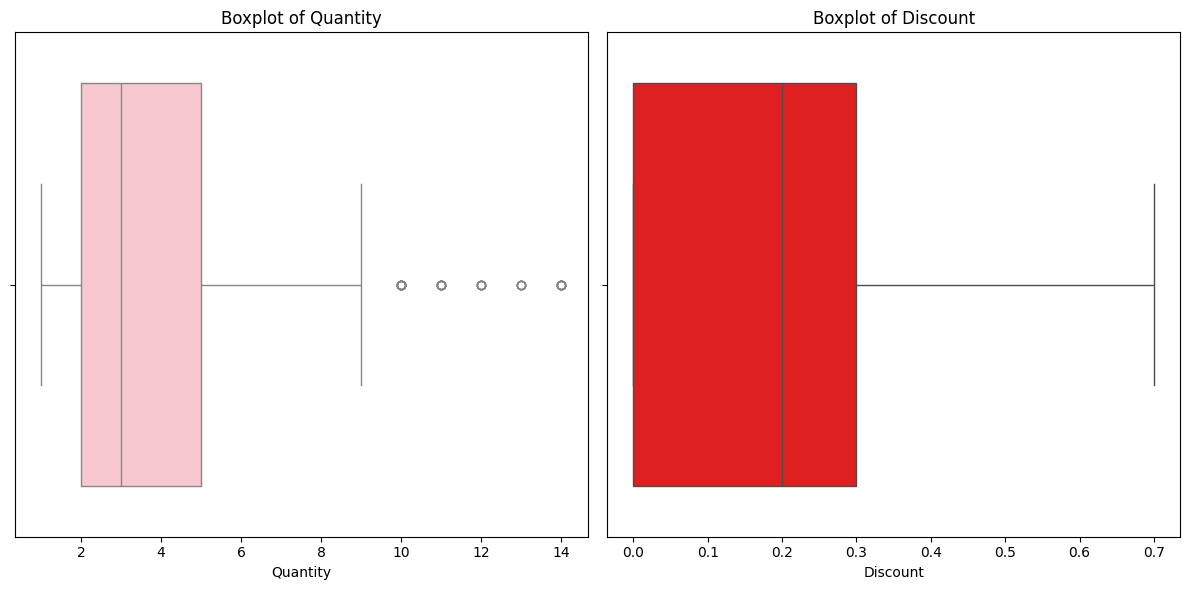

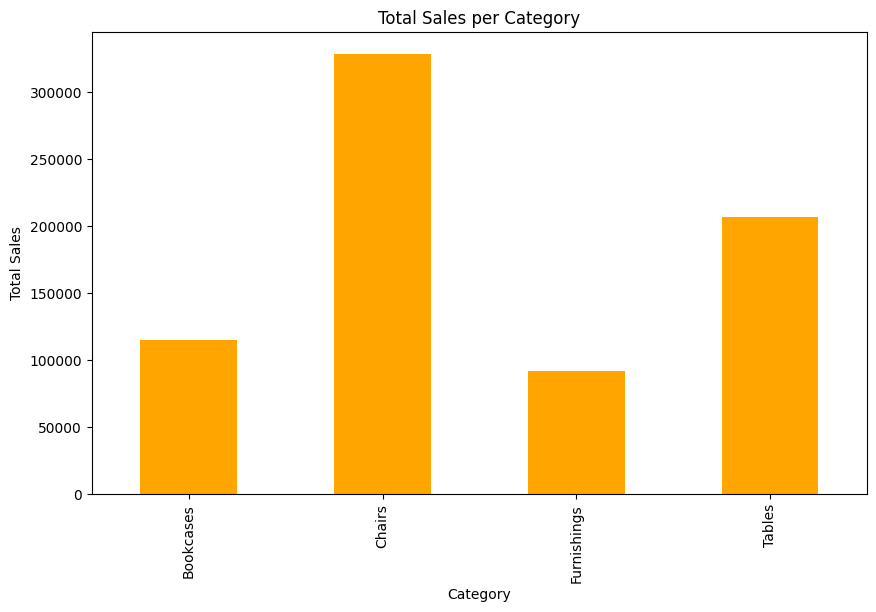

In [39]:
# Histograms for Sales and Profit
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['Sales'], bins=30, color='skyblue', edgecolor='black')
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['Profit'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Profit Distribution')
plt.xlabel('Profit')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Boxplots for Quantity and Discount
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Quantity'], color='pink')
plt.title('Boxplot of Quantity')
plt.xlabel('Quantity')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Discount'], color='red')
plt.title('Boxplot of Discount')
plt.xlabel('Discount')

plt.tight_layout()
plt.show()

# Bar plot for total sales per sub-category
plt.figure(figsize=(10, 6))
df.groupby('Sub-Category')['Sales'].sum().plot(kind='bar', color='orange')
plt.title('Total Sales per Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()


In [40]:
# Convert data types of columns
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

from sklearn.preprocessing import LabelEncoder
column_mappings = {}
label_encoders = {}
categorical_columns = ['Order ID', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name']
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le
    # Store the mapping of original values to encoded values
    column_mappings[column] = dict(zip(le.transform(le.classes_), le.classes_))
    
print(df.dtypes)

Row ID                    int64
Order ID                  int64
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                 int64
Customer ID               int64
Customer Name             int64
Segment                   int64
Country                   int64
City                      int64
State                     int64
Postal Code               int64
Region                    int64
Product ID                int64
Category                  int64
Sub-Category              int64
Product Name              int64
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object


## 2. Clean data

In [41]:
# Drop rows with missing values
print("Missing values in the dataset:")
print(df.isnull().sum())
df = df.dropna()  

# Remove outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
for column in ['Sales', 'Profit', 'Quantity', 'Discount']:
    df = remove_outliers(df, column)

# Normalize numerical columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_columns = ['Sales', 'Profit', 'Quantity', 'Discount']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Check for class imbalance in the 'Segment' column
from imblearn.under_sampling import RandomUnderSampler
x = df.drop('Segment', axis=1)
y = df['Segment']
rus = RandomUnderSampler(random_state=42)
x_resampled, y_resampled = rus.fit_resample(x, y)
is_balanced = y_resampled.value_counts().nunique() == 1
print("Balanced?", is_balanced)




Missing values in the dataset:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64
Balanced? True


In [42]:
# Convert 'Order Date' and 'Ship Date' to datetime and extract date components
x_resampled['Order_Year'] = x_resampled['Order Date'].dt.year
x_resampled['Order_Month'] = x_resampled['Order Date'].dt.month
x_resampled['Order_Day'] = x_resampled['Order Date'].dt.day
x_resampled['Ship_Year'] = x_resampled['Ship Date'].dt.year
x_resampled['Ship_Month'] = x_resampled['Ship Date'].dt.month
x_resampled['Ship_Day'] = x_resampled['Ship Date'].dt.day
x_resampled = x_resampled.drop(['Order Date', 'Ship Date'], axis=1)

# Feature importance using Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_resampled, y_resampled)
feature_importances = rf.feature_importances_
importance_df = pd.DataFrame({'Feature': x_resampled.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df.head(10))

          Feature  Importance
4   Customer Name    0.078113
3     Customer ID    0.074345
1        Order ID    0.067488
0          Row ID    0.067374
14          Sales    0.065938
8     Postal Code    0.064416
6            City    0.059836
17         Profit    0.057294
13   Product Name    0.056197
10     Product ID    0.056018


## 3. Visualise data

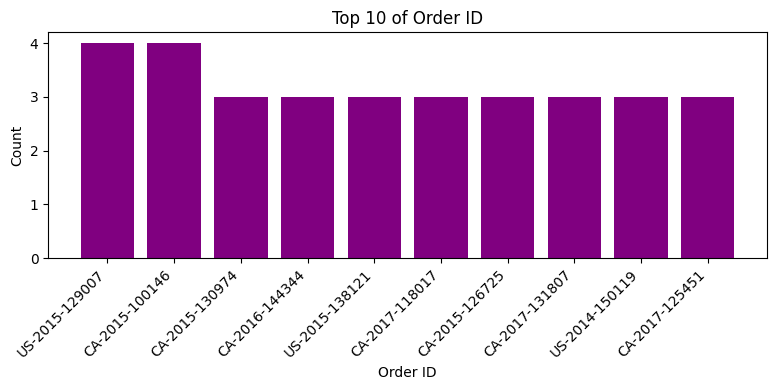

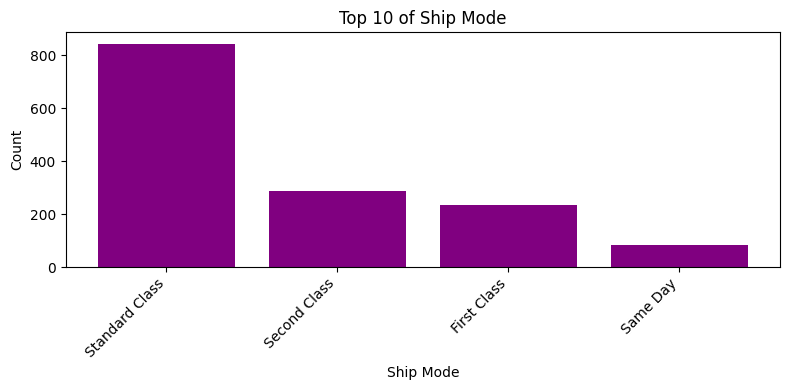

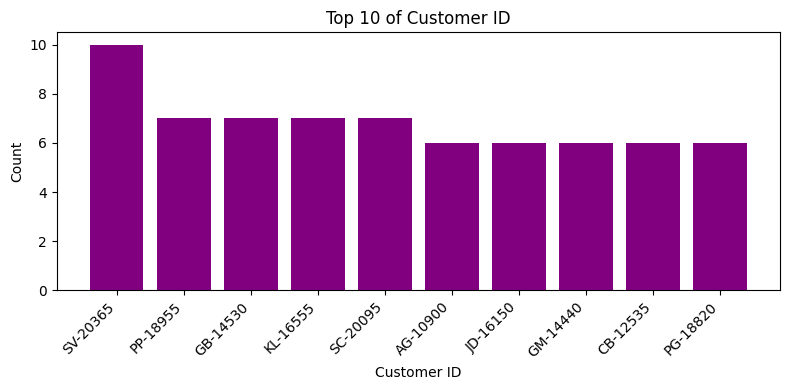

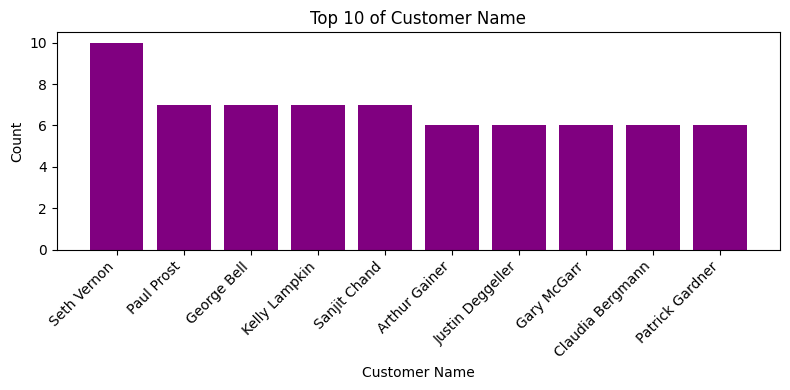

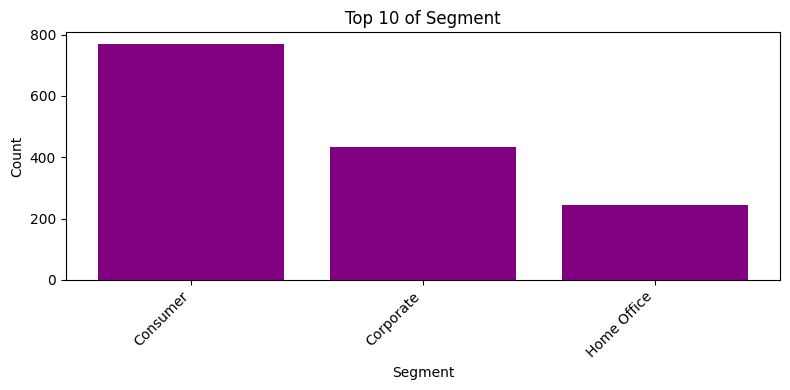

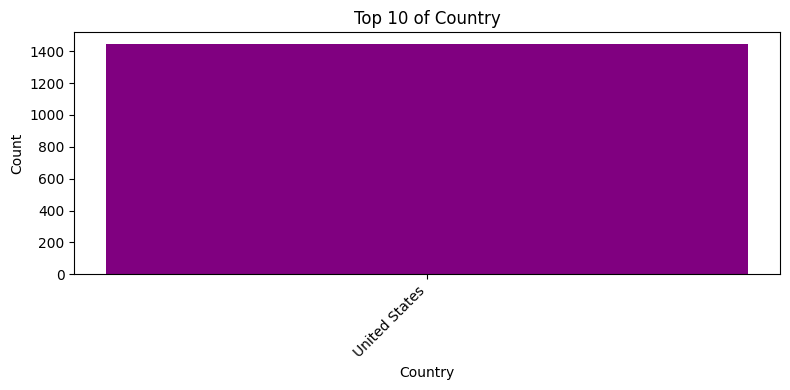

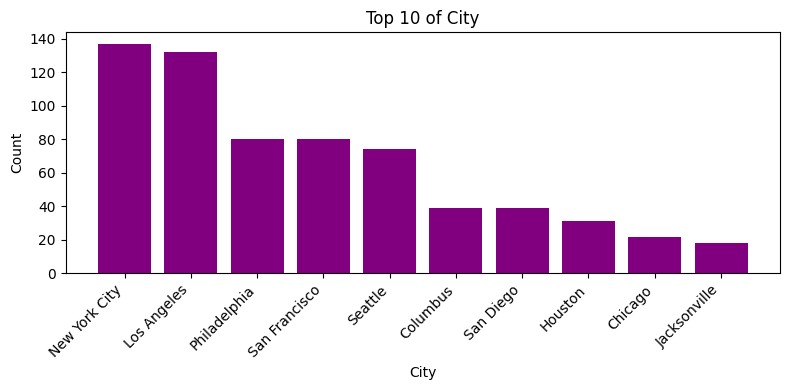

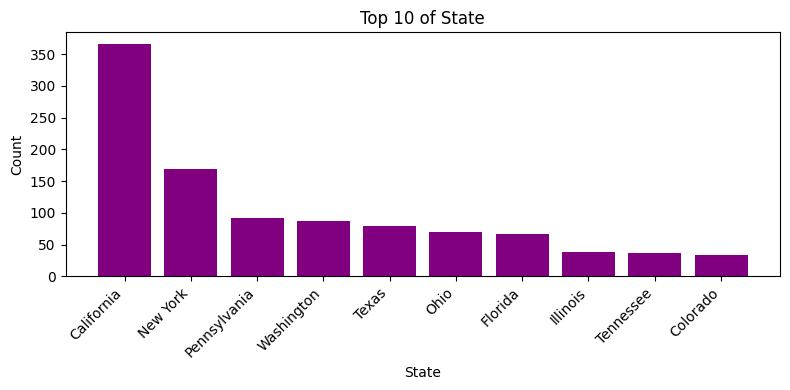

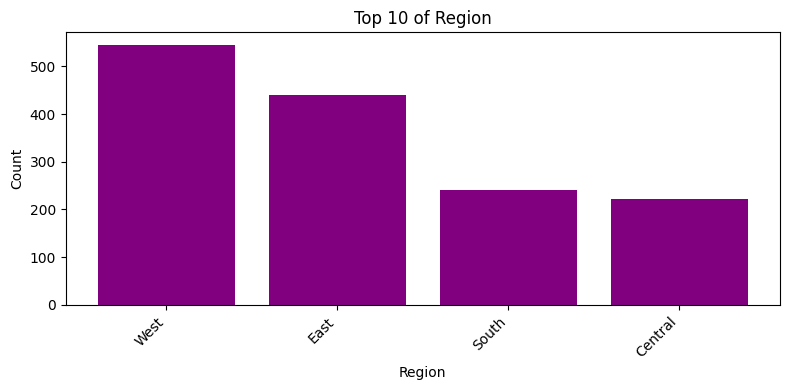

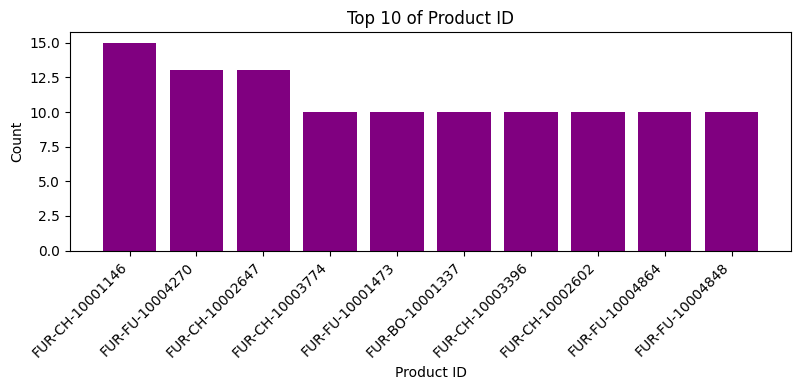

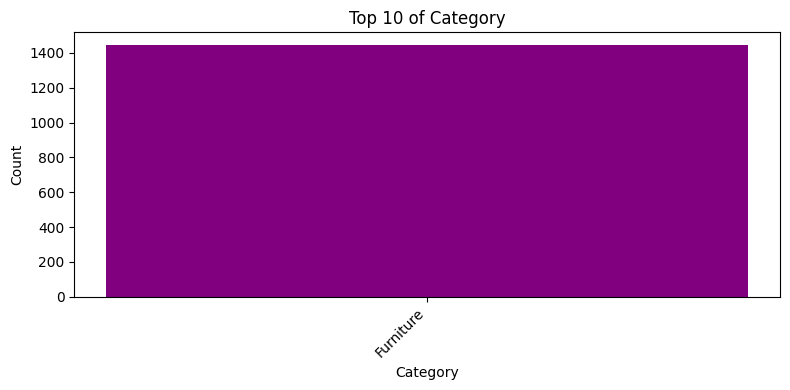

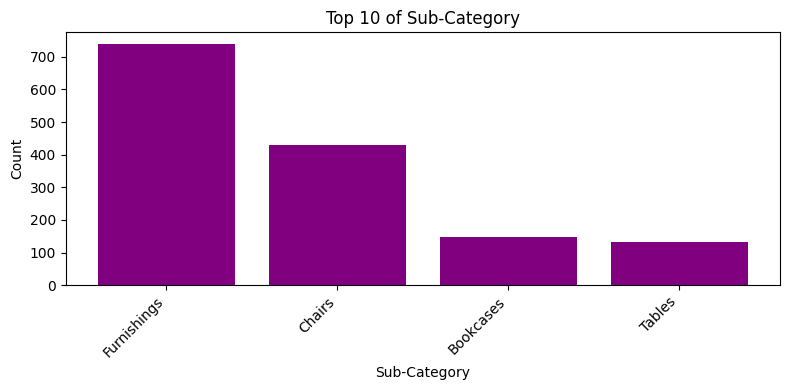

/var/folders/5x/mssgk83922xd5hkymkggmnn80000gn/T/ipykernel_21901/148793233.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


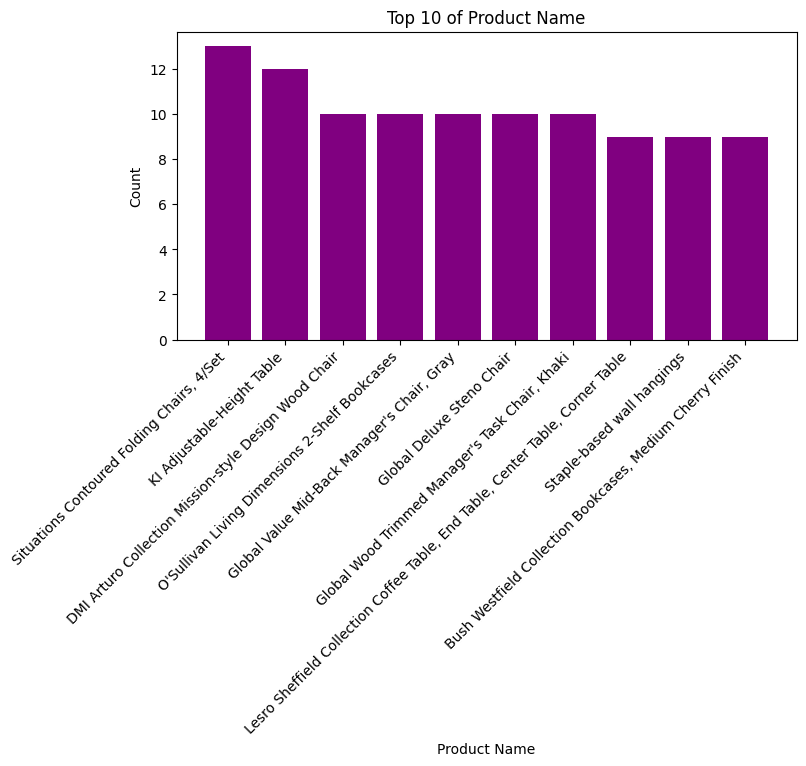

In [43]:

categorical_columns = ['Order ID', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name']
for column in categorical_columns:
    plt.figure(figsize=(8, 4))
    counts = df[column].value_counts().head(10)
    labels = [column_mappings[column][i] for i in counts.index]
    plt.bar(labels, counts.values, color='purple')
    plt.title(f'Top 10 of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha ='right')
    plt.tight_layout()
    plt.show()


In [45]:
print(x_resampled.columns)

Index(['Row ID', 'Order ID', 'Ship Mode', 'Customer ID', 'Customer Name',
       'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Order_Year', 'Order_Month', 'Order_Day',
       'Ship_Year', 'Ship_Month', 'Ship_Day'],
      dtype='object')


/var/folders/5x/mssgk83922xd5hkymkggmnn80000gn/T/ipykernel_21901/4264685011.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  aggregated = x_resampled.groupby([pd.Grouper(freq=freq_str), column]).size().unstack(fill_value=0)


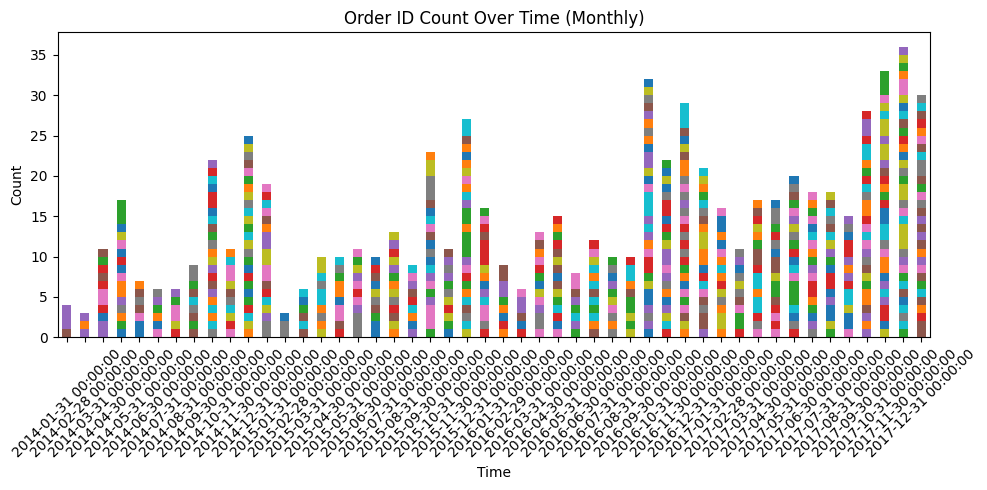

/var/folders/5x/mssgk83922xd5hkymkggmnn80000gn/T/ipykernel_21901/4264685011.py:11: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  aggregated = x_resampled.groupby([pd.Grouper(freq=freq_str), column]).size().unstack(fill_value=0)


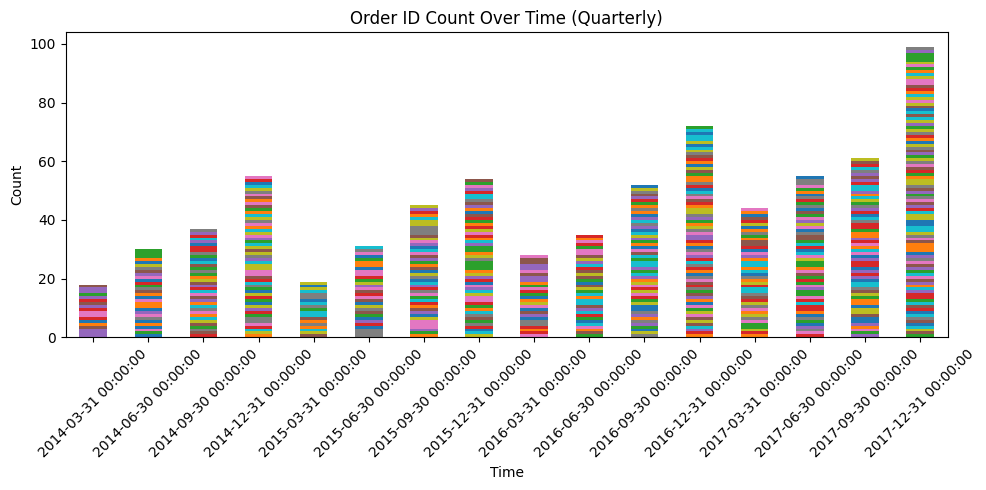

/var/folders/5x/mssgk83922xd5hkymkggmnn80000gn/T/ipykernel_21901/4264685011.py:11: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  aggregated = x_resampled.groupby([pd.Grouper(freq=freq_str), column]).size().unstack(fill_value=0)


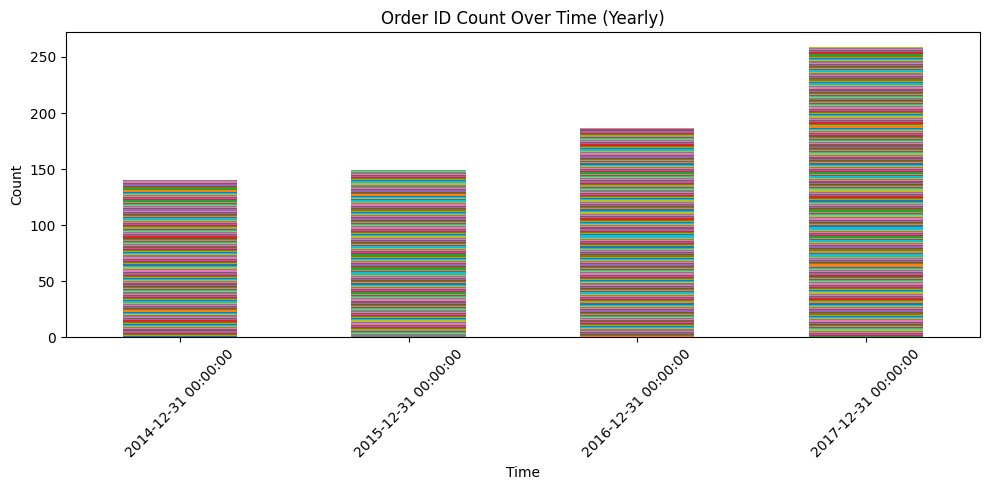

/var/folders/5x/mssgk83922xd5hkymkggmnn80000gn/T/ipykernel_21901/4264685011.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  aggregated = x_resampled.groupby([pd.Grouper(freq=freq_str), column]).size().unstack(fill_value=0)


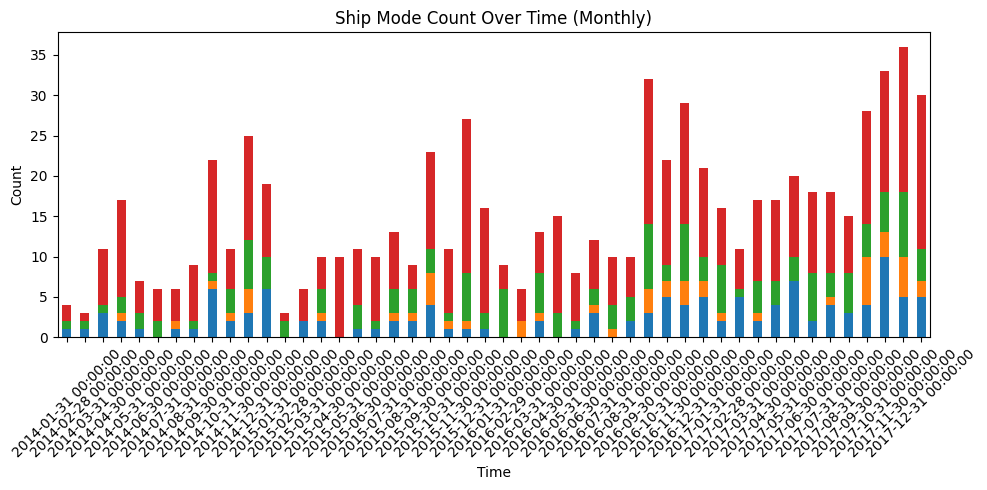

/var/folders/5x/mssgk83922xd5hkymkggmnn80000gn/T/ipykernel_21901/4264685011.py:11: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  aggregated = x_resampled.groupby([pd.Grouper(freq=freq_str), column]).size().unstack(fill_value=0)


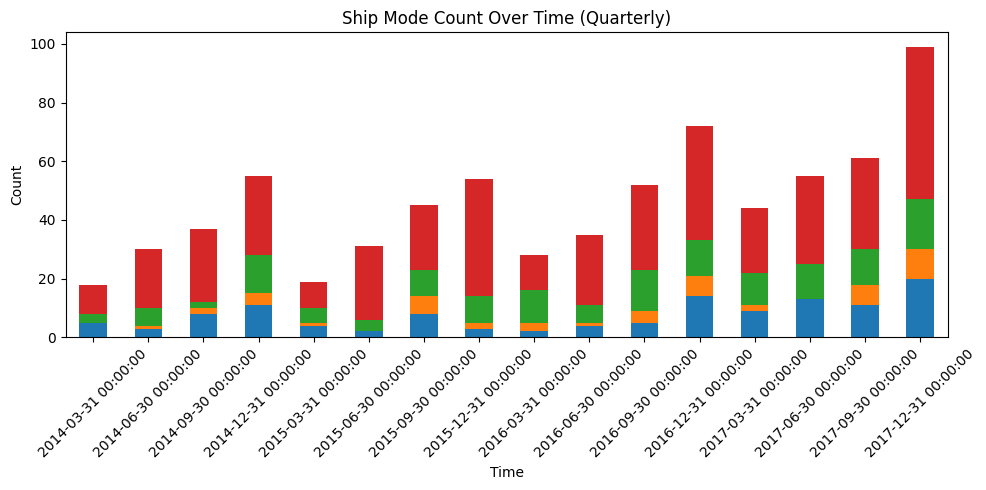

/var/folders/5x/mssgk83922xd5hkymkggmnn80000gn/T/ipykernel_21901/4264685011.py:11: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  aggregated = x_resampled.groupby([pd.Grouper(freq=freq_str), column]).size().unstack(fill_value=0)


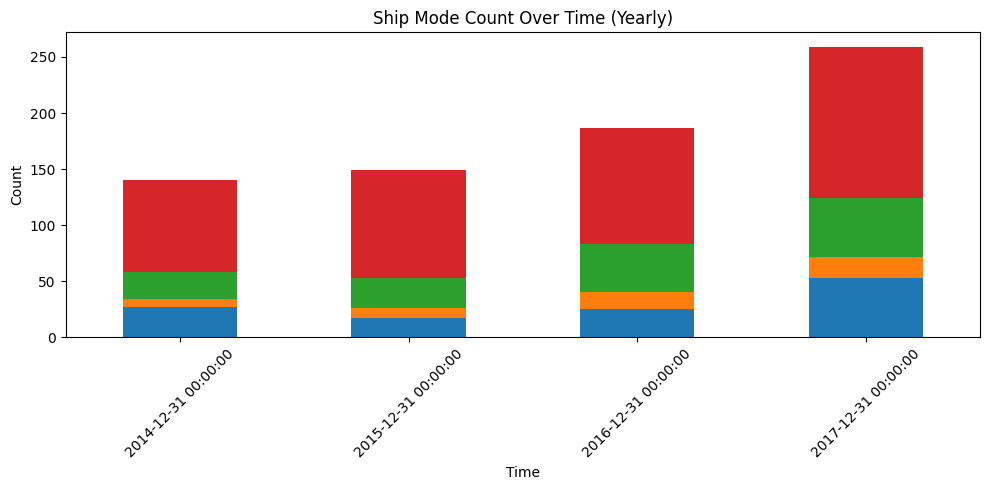

/var/folders/5x/mssgk83922xd5hkymkggmnn80000gn/T/ipykernel_21901/4264685011.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  aggregated = x_resampled.groupby([pd.Grouper(freq=freq_str), column]).size().unstack(fill_value=0)


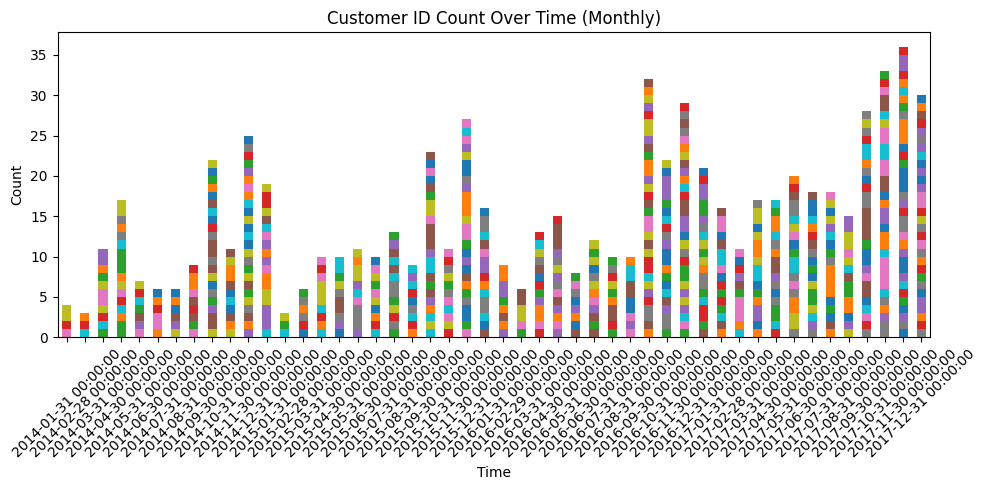

/var/folders/5x/mssgk83922xd5hkymkggmnn80000gn/T/ipykernel_21901/4264685011.py:11: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  aggregated = x_resampled.groupby([pd.Grouper(freq=freq_str), column]).size().unstack(fill_value=0)


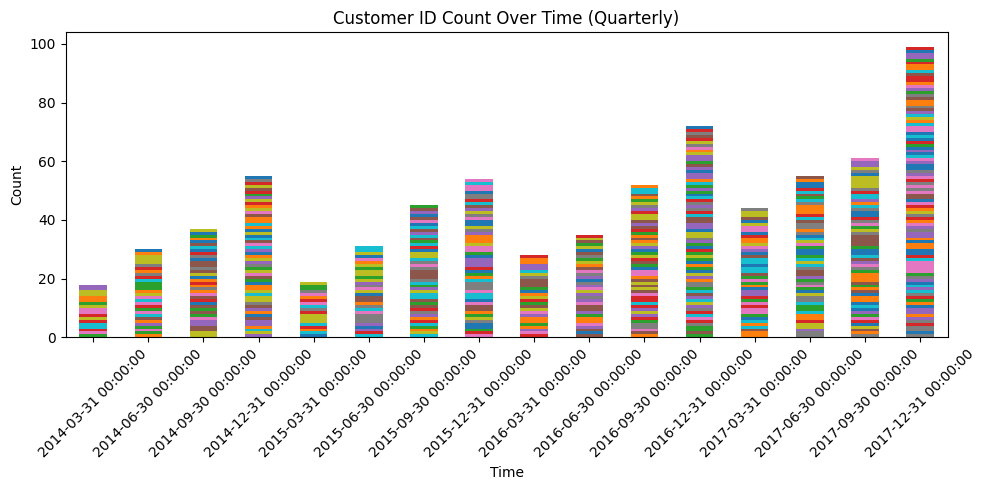

/var/folders/5x/mssgk83922xd5hkymkggmnn80000gn/T/ipykernel_21901/4264685011.py:11: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  aggregated = x_resampled.groupby([pd.Grouper(freq=freq_str), column]).size().unstack(fill_value=0)


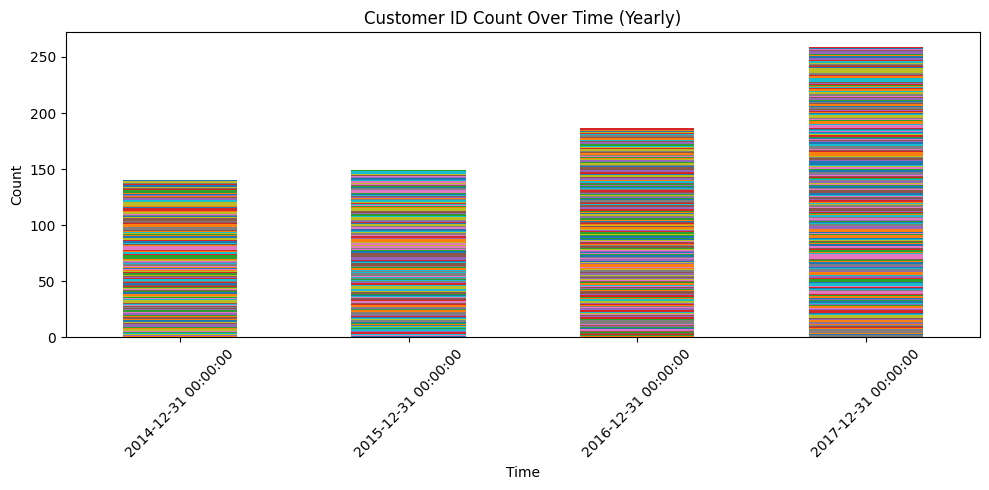

/var/folders/5x/mssgk83922xd5hkymkggmnn80000gn/T/ipykernel_21901/4264685011.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  aggregated = x_resampled.groupby([pd.Grouper(freq=freq_str), column]).size().unstack(fill_value=0)


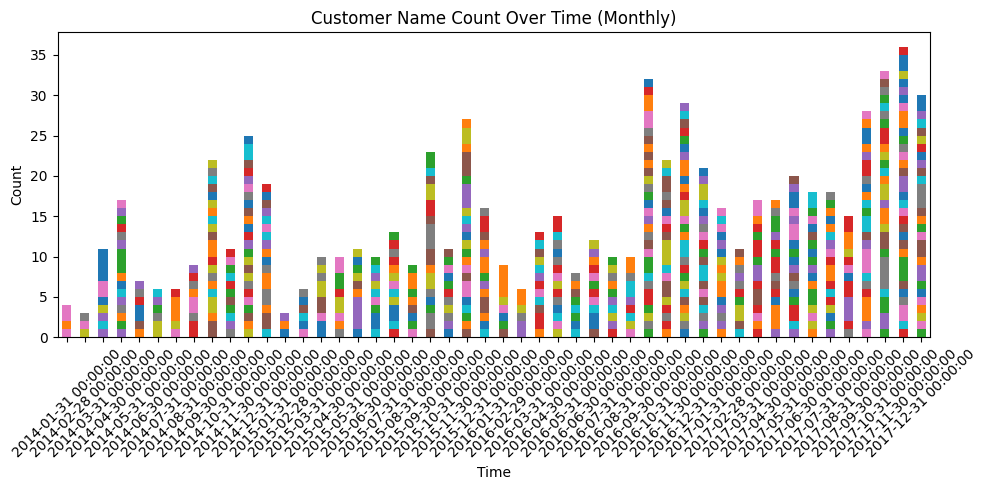

/var/folders/5x/mssgk83922xd5hkymkggmnn80000gn/T/ipykernel_21901/4264685011.py:11: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  aggregated = x_resampled.groupby([pd.Grouper(freq=freq_str), column]).size().unstack(fill_value=0)


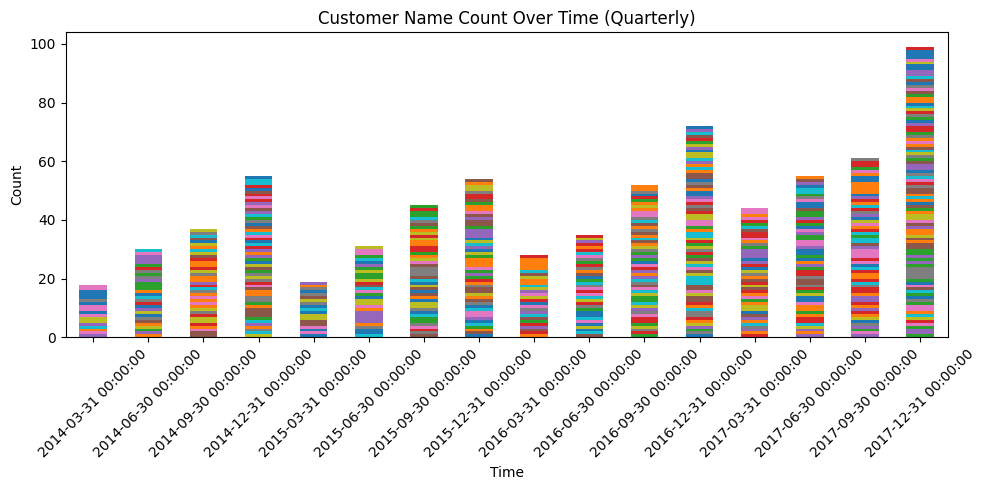

/var/folders/5x/mssgk83922xd5hkymkggmnn80000gn/T/ipykernel_21901/4264685011.py:11: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  aggregated = x_resampled.groupby([pd.Grouper(freq=freq_str), column]).size().unstack(fill_value=0)


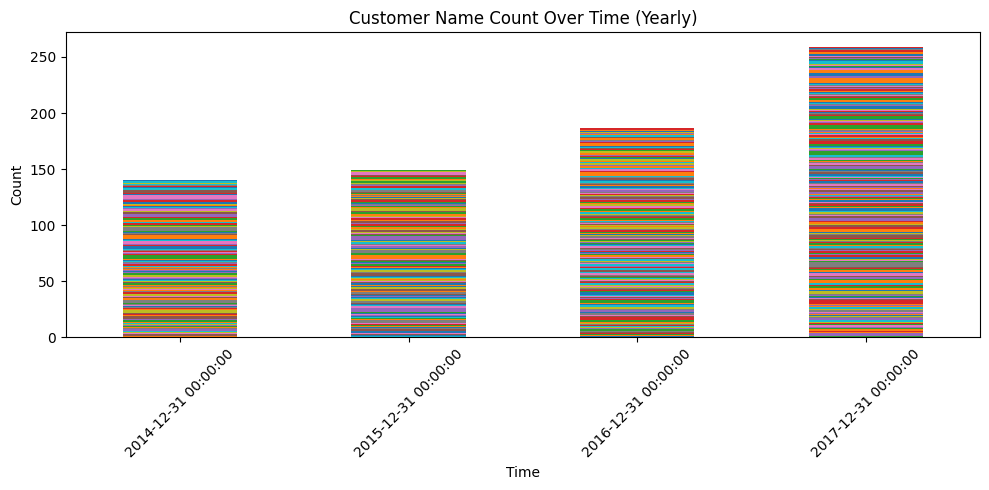

/var/folders/5x/mssgk83922xd5hkymkggmnn80000gn/T/ipykernel_21901/4264685011.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  aggregated = x_resampled.groupby([pd.Grouper(freq=freq_str), column]).size().unstack(fill_value=0)


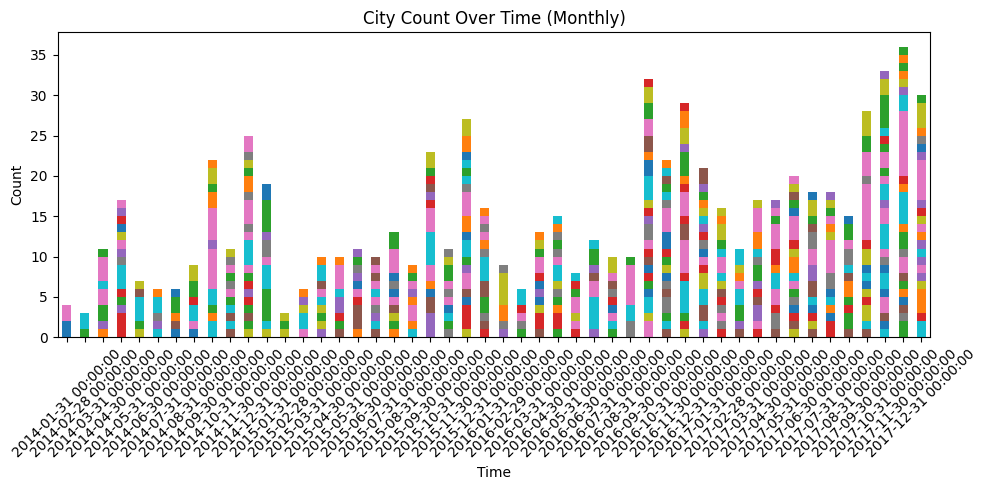

/var/folders/5x/mssgk83922xd5hkymkggmnn80000gn/T/ipykernel_21901/4264685011.py:11: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  aggregated = x_resampled.groupby([pd.Grouper(freq=freq_str), column]).size().unstack(fill_value=0)


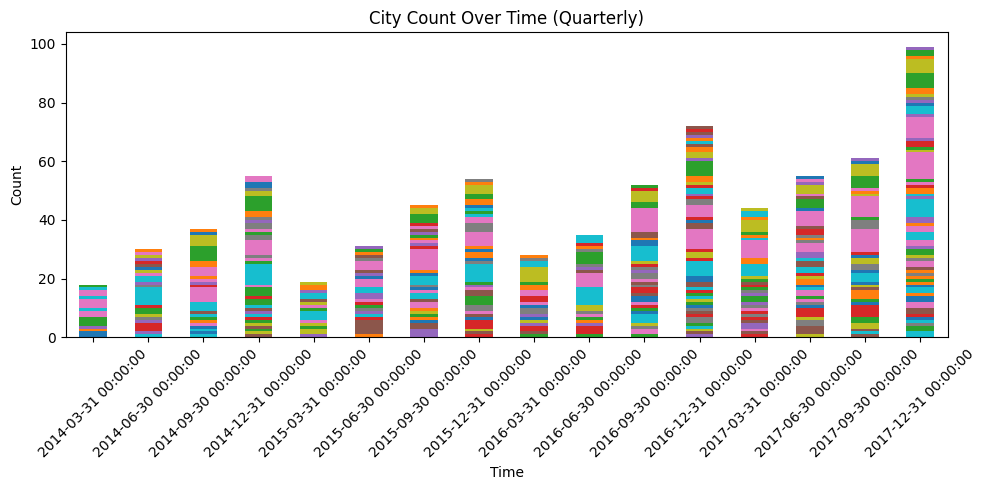

/var/folders/5x/mssgk83922xd5hkymkggmnn80000gn/T/ipykernel_21901/4264685011.py:11: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  aggregated = x_resampled.groupby([pd.Grouper(freq=freq_str), column]).size().unstack(fill_value=0)


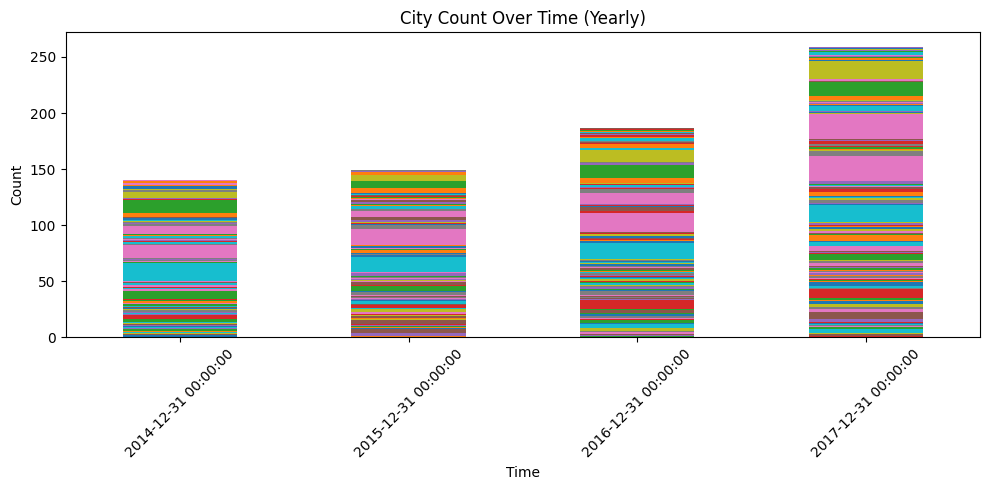

/var/folders/5x/mssgk83922xd5hkymkggmnn80000gn/T/ipykernel_21901/4264685011.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  aggregated = x_resampled.groupby([pd.Grouper(freq=freq_str), column]).size().unstack(fill_value=0)


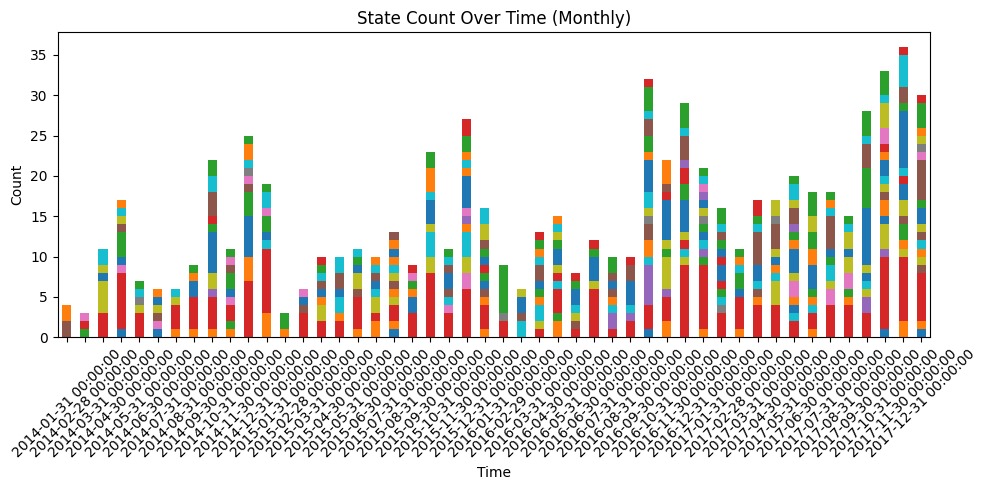

/var/folders/5x/mssgk83922xd5hkymkggmnn80000gn/T/ipykernel_21901/4264685011.py:11: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  aggregated = x_resampled.groupby([pd.Grouper(freq=freq_str), column]).size().unstack(fill_value=0)


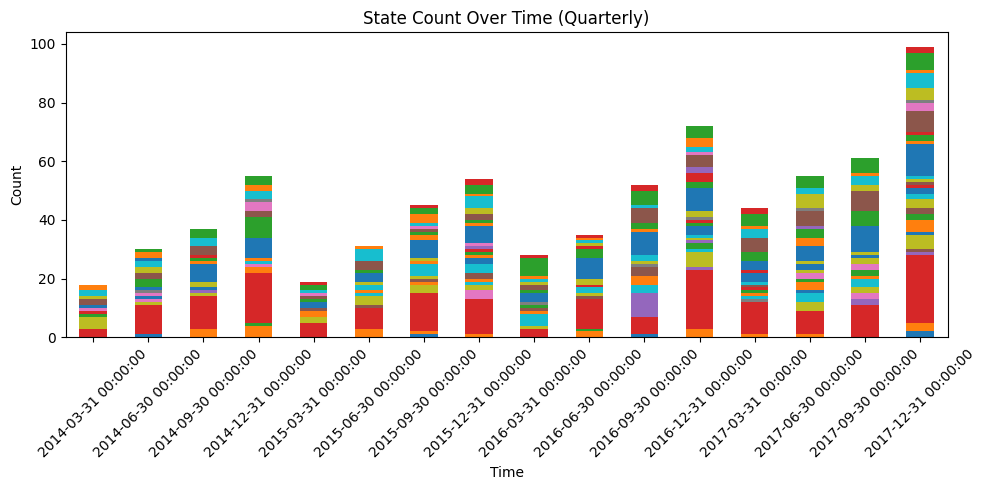

/var/folders/5x/mssgk83922xd5hkymkggmnn80000gn/T/ipykernel_21901/4264685011.py:11: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  aggregated = x_resampled.groupby([pd.Grouper(freq=freq_str), column]).size().unstack(fill_value=0)


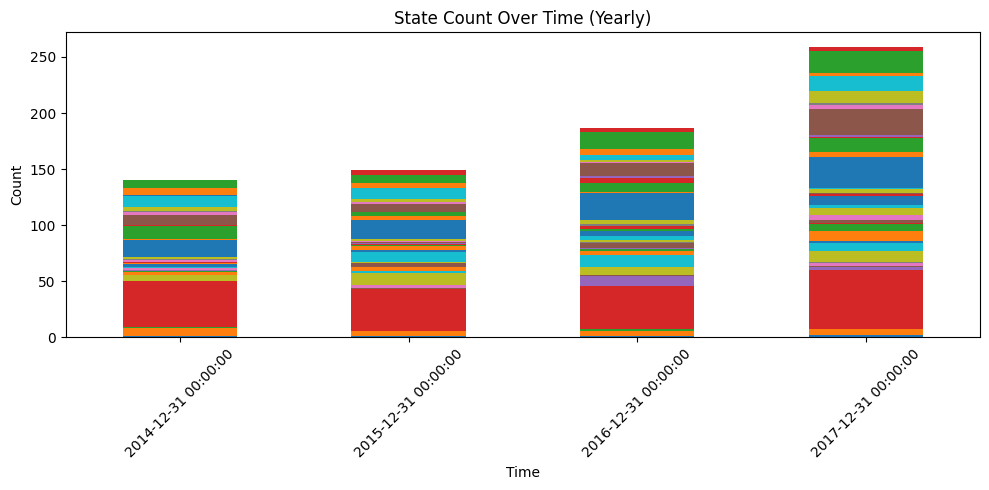

/var/folders/5x/mssgk83922xd5hkymkggmnn80000gn/T/ipykernel_21901/4264685011.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  aggregated = x_resampled.groupby([pd.Grouper(freq=freq_str), column]).size().unstack(fill_value=0)


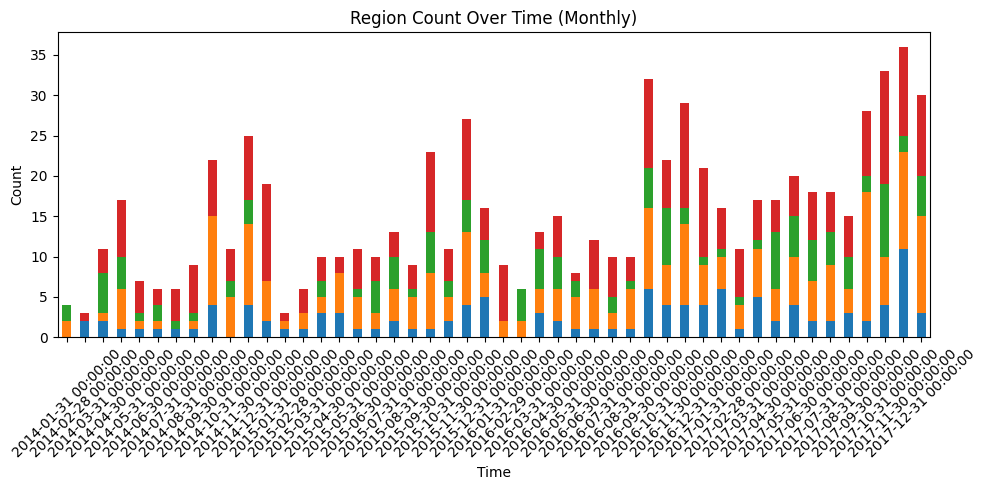

/var/folders/5x/mssgk83922xd5hkymkggmnn80000gn/T/ipykernel_21901/4264685011.py:11: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  aggregated = x_resampled.groupby([pd.Grouper(freq=freq_str), column]).size().unstack(fill_value=0)


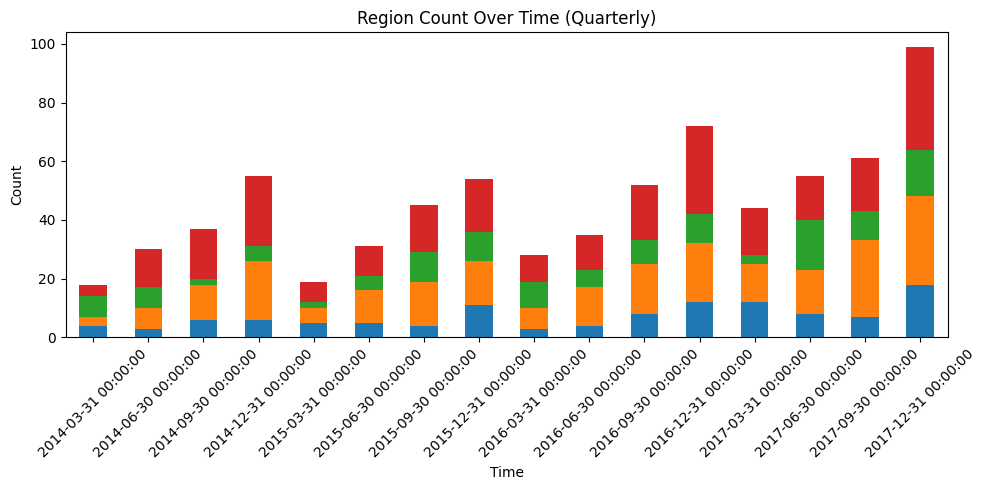

/var/folders/5x/mssgk83922xd5hkymkggmnn80000gn/T/ipykernel_21901/4264685011.py:11: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  aggregated = x_resampled.groupby([pd.Grouper(freq=freq_str), column]).size().unstack(fill_value=0)


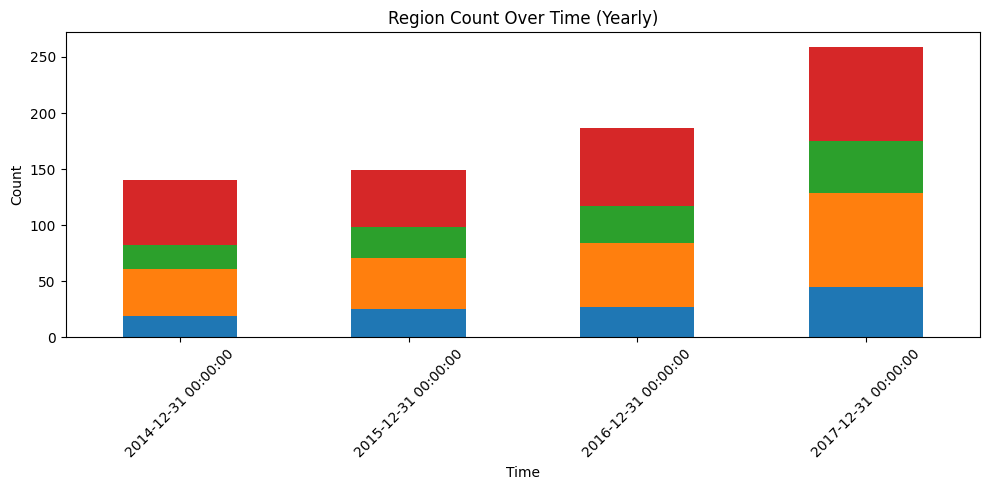

/var/folders/5x/mssgk83922xd5hkymkggmnn80000gn/T/ipykernel_21901/4264685011.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  aggregated = x_resampled.groupby([pd.Grouper(freq=freq_str), column]).size().unstack(fill_value=0)


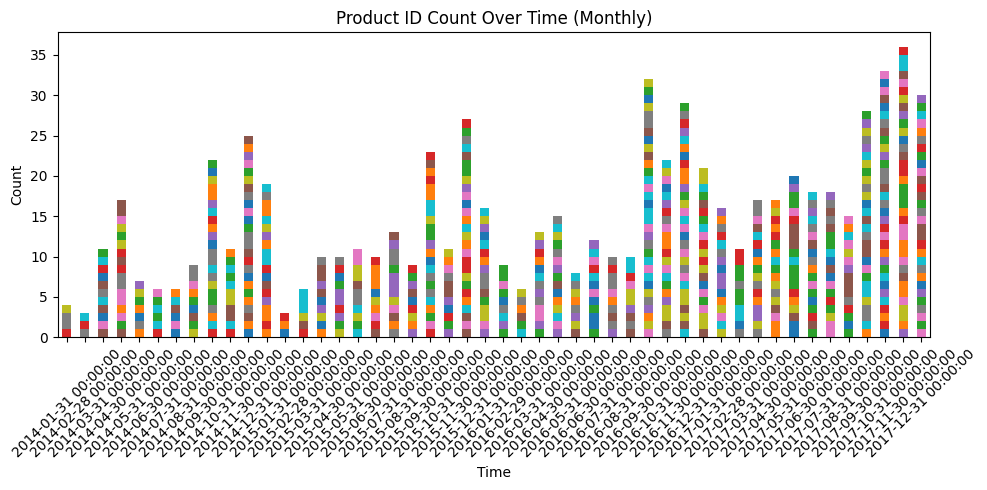

/var/folders/5x/mssgk83922xd5hkymkggmnn80000gn/T/ipykernel_21901/4264685011.py:11: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  aggregated = x_resampled.groupby([pd.Grouper(freq=freq_str), column]).size().unstack(fill_value=0)


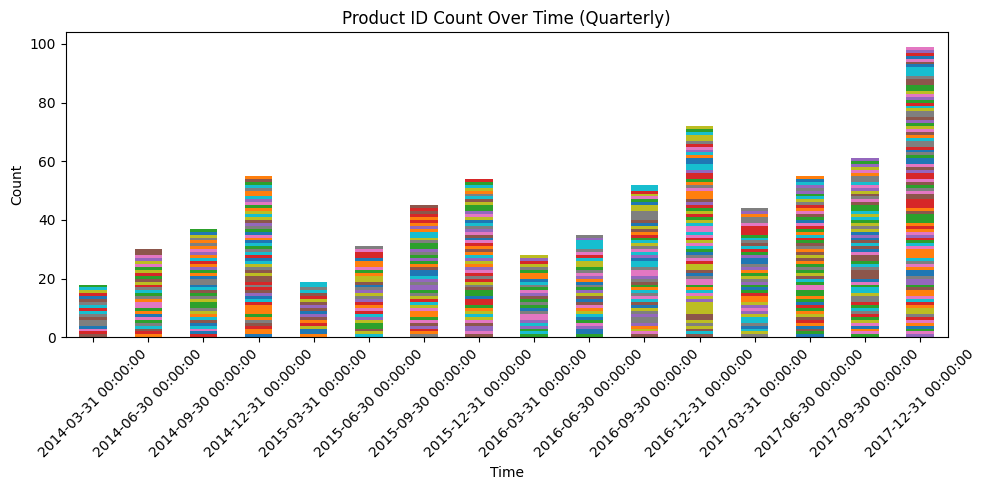

/var/folders/5x/mssgk83922xd5hkymkggmnn80000gn/T/ipykernel_21901/4264685011.py:11: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  aggregated = x_resampled.groupby([pd.Grouper(freq=freq_str), column]).size().unstack(fill_value=0)


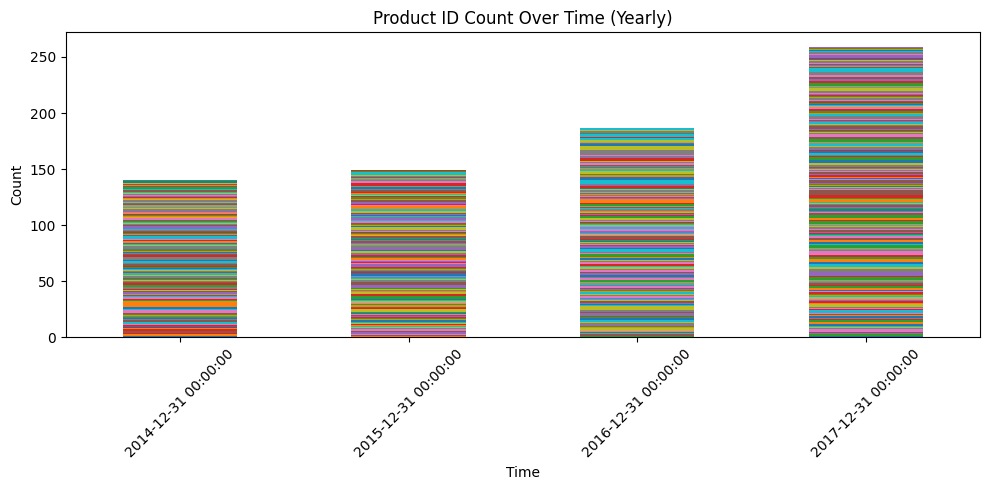

/var/folders/5x/mssgk83922xd5hkymkggmnn80000gn/T/ipykernel_21901/4264685011.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  aggregated = x_resampled.groupby([pd.Grouper(freq=freq_str), column]).size().unstack(fill_value=0)


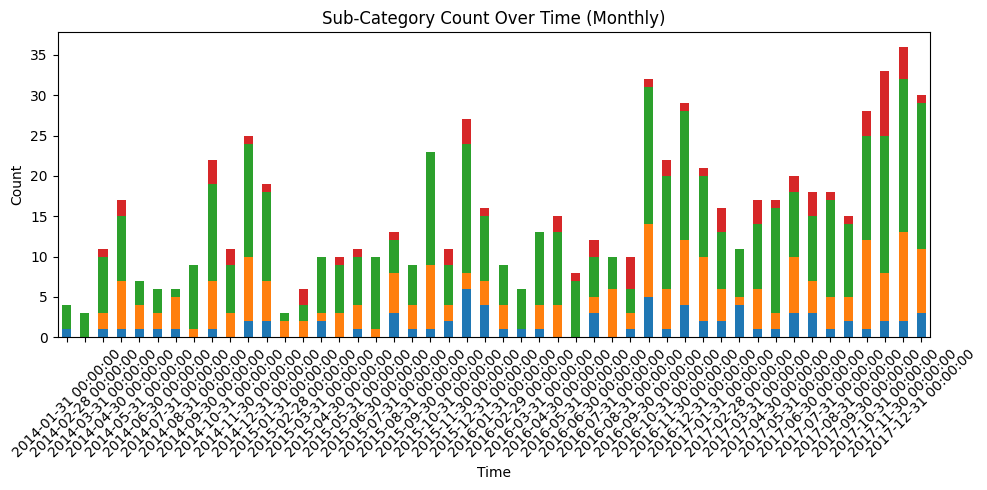

/var/folders/5x/mssgk83922xd5hkymkggmnn80000gn/T/ipykernel_21901/4264685011.py:11: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  aggregated = x_resampled.groupby([pd.Grouper(freq=freq_str), column]).size().unstack(fill_value=0)


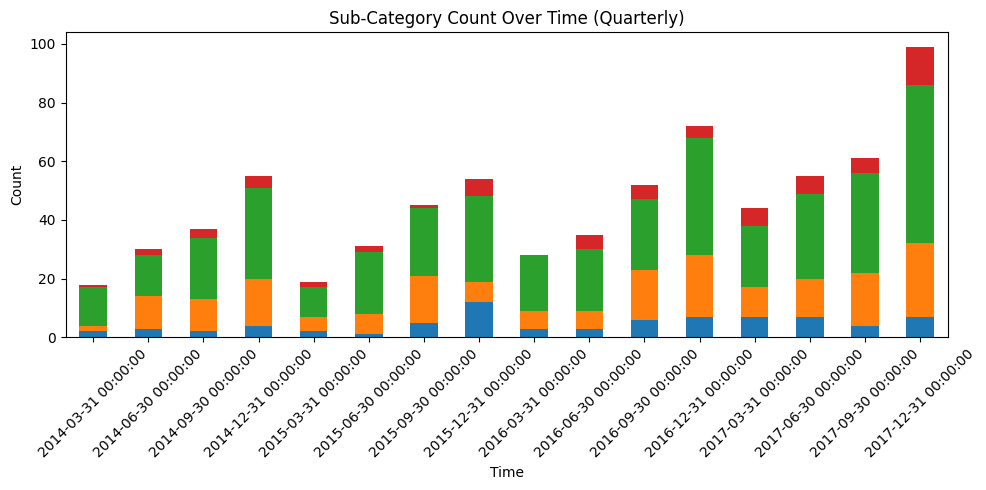

/var/folders/5x/mssgk83922xd5hkymkggmnn80000gn/T/ipykernel_21901/4264685011.py:11: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  aggregated = x_resampled.groupby([pd.Grouper(freq=freq_str), column]).size().unstack(fill_value=0)


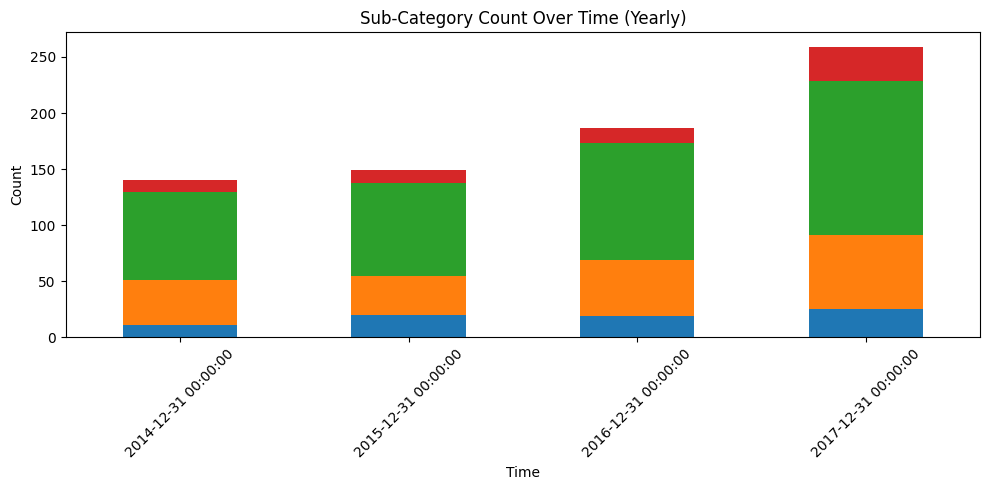

/var/folders/5x/mssgk83922xd5hkymkggmnn80000gn/T/ipykernel_21901/4264685011.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  aggregated = x_resampled.groupby([pd.Grouper(freq=freq_str), column]).size().unstack(fill_value=0)


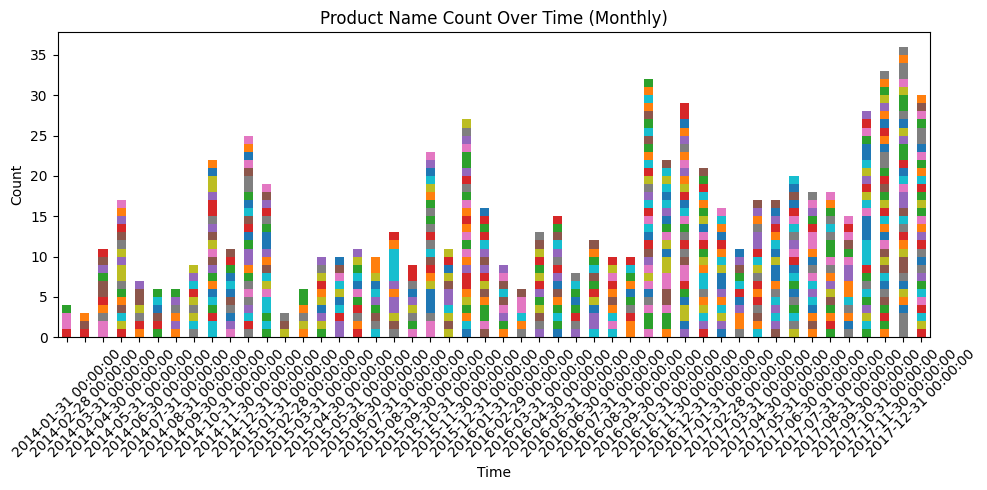

/var/folders/5x/mssgk83922xd5hkymkggmnn80000gn/T/ipykernel_21901/4264685011.py:11: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  aggregated = x_resampled.groupby([pd.Grouper(freq=freq_str), column]).size().unstack(fill_value=0)


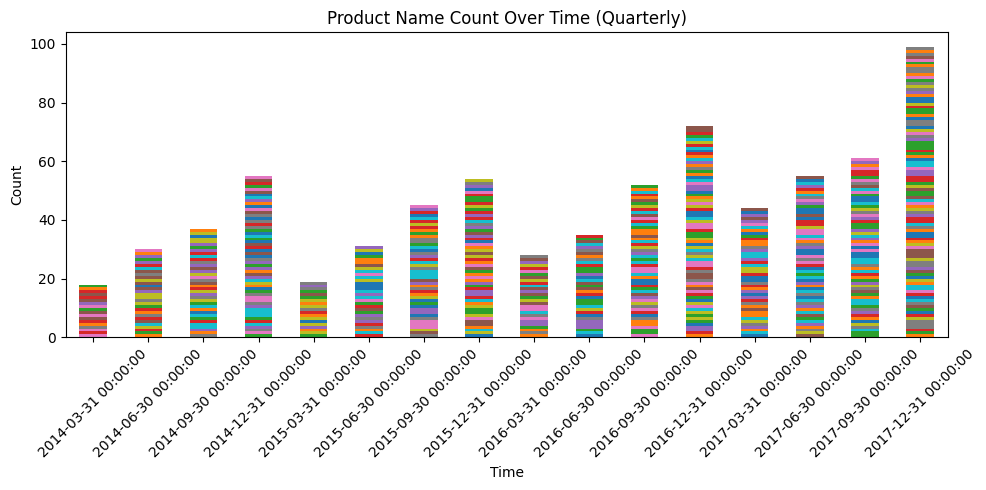

/var/folders/5x/mssgk83922xd5hkymkggmnn80000gn/T/ipykernel_21901/4264685011.py:11: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  aggregated = x_resampled.groupby([pd.Grouper(freq=freq_str), column]).size().unstack(fill_value=0)


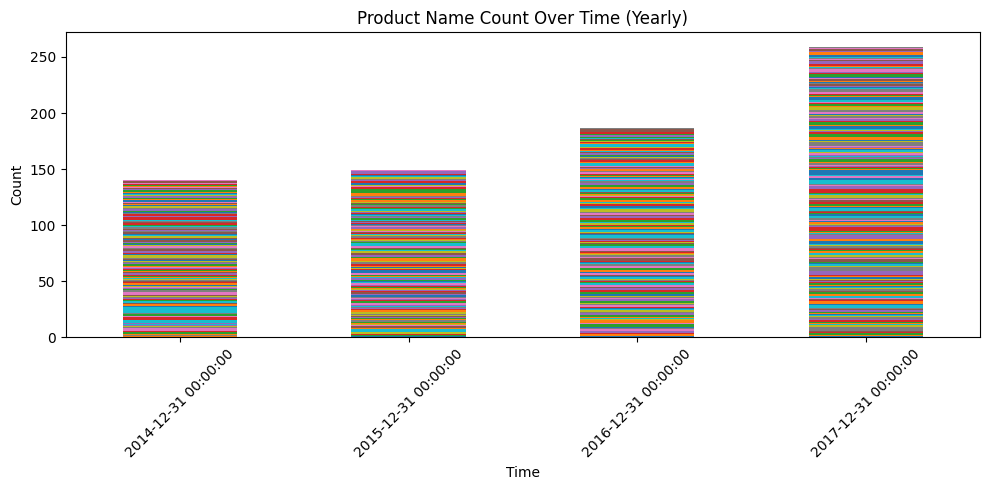

In [52]:
x_resampled['Order_Date'] = pd.to_datetime({'year': x_resampled['Order_Year'], 'month': x_resampled['Order_Month'], 'day': x_resampled['Order_Day']})
x_resampled.set_index('Order_Date', inplace=True)
time_series = {
    'Monthly' : 'M',
    'Quarterly' : 'Q',
    'Yearly' : 'Y'
}
categorical_columns = ['Order ID', 'Ship Mode', 'Customer ID', 'Customer Name', 'City', 'State', 'Region', 'Product ID', 'Sub-Category', 'Product Name']
for column in categorical_columns:
    for freq, freq_str in time_series.items():
        aggregated = x_resampled.groupby([pd.Grouper(freq=freq_str), column]).size().unstack(fill_value=0)
        aggregated.plot(kind='bar', stacked=True, figsize=(10, 5))
        plt.title(f'{column} Count Over Time ({freq})')
        plt.xlabel('Time')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.legend().remove()
        plt.tight_layout()
        plt.show()

## 4. Identify correlated variables

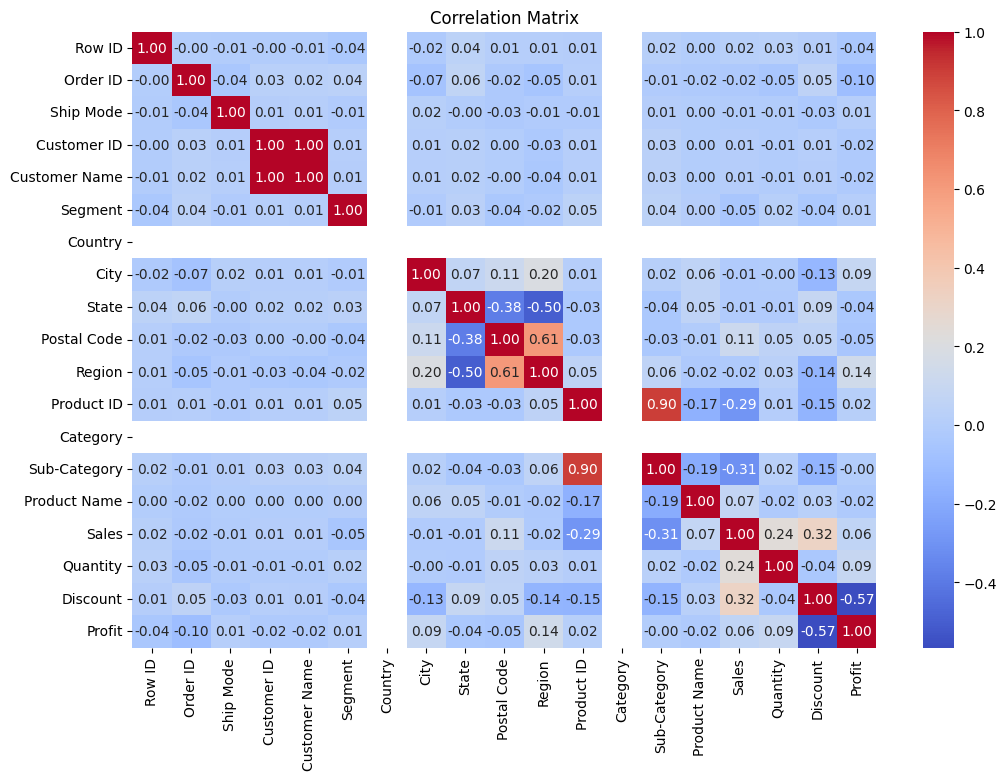

Correlated pairs:
 Customer ID   Customer Name    0.995324
Product ID    Sub-Category     0.901362
Postal Code   Region           0.610018
Profit        Discount         0.565638
State         Region           0.500369
              Postal Code      0.384666
Discount      Sales            0.320706
Sub-Category  Sales            0.309637
Product ID    Sales            0.291166
Sales         Quantity         0.235949
dtype: float64


In [ ]:
# Correlation matrix for numerical features
numerical_df = df.select_dtypes(include=[np.number])
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Find pairs of features with high correlation
correlated_pairs = correlation_matrix.abs().unstack().sort_values(ascending=False)
correlated_pairs = correlated_pairs[correlated_pairs < 1].drop_duplicates()
print("Correlated pairs:\n", correlated_pairs.head(10))

## 5. Summary

Firstly, I loaded the dataset and made histograms and boxplots for numerical variables like “Sales”, “Profit”, “Quantity” and “Discount” to detect outliers and skewness. Secondly, I changed the original “Order Date” and “Ship Date” columns to datetime format, and used label encoding to transform categorical columns into numeric values and store the mappings. Next, I cleaned the data by handling missing values, removing or normalizing outliers, through sampling to solve the class imbalance problem, and used RandomForestClassifier to evaluate the important features for the target label and remove insignificant features to improve the model efficiency. Then, I made bar charts to show the top 10 most frequent values for each categorical column, and used stacked bar plots to analyse categorical column change over time (monthly, quarterly and yearly). Lastly, I did a correlation heat map to analyse all numerical variables to extract highly correlated variable pairs.

According to the histograms and boxplots for numerical variables, “Sales” is right-skewed, with most values from $0 to $500, and some extreme values above $4000. “Profit” centres around 0, but some losses below -$1000. Chairs produced the highest sales revenue, with Tables is second. “Quantity” mostly ranges from 2-6 units, but some values exceed 12. “Discount” mostly ranges from 0-0.3 but spikes up to 0.7. Those are outliers. According to the correlation heat map, “Customer Name” is almost the same as “Customer ID” (corr = 0.995), “Sub-Category” is highly correlated with “Product ID” (corr = 0.90). “Discount” and “Profit” are negative correlations (corr = 0.57), which means discount significantly affects profit.
